In [103]:
#importing libraries
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [104]:
#getting the data
#setting up the api key for extracting data from Quandl
quandl.ApiConfig.api_key='nAsXM5RzKg-T8KsVwMrc'

#extracting data for Chevron Corporation
df=quandl.get("WIKI/CVX")
df=df[['Adj. Close']]

In this project we are predicting stock prices of Chevron Corporations. It can also be used for other companies just by adding the symbol of the company for which you want to predict the price. The symbol of the company can be found here on this website: https://finance.yahoo.com/lookup. For example: If you want predict prices of Google, then you have to replace WIKI/CVX by WIKI/GOOGL. 

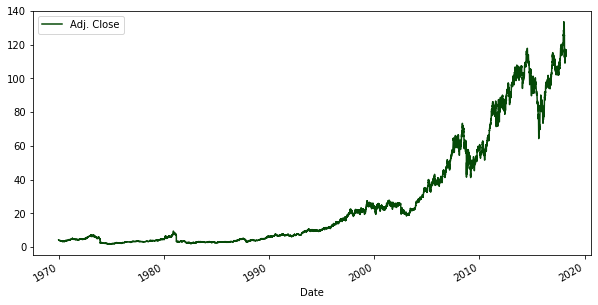

In [175]:
#plotting the current trend
df['Adj. Close'].plot(figsize=(10,5),color='#054907')
plot.legend(loc='upper left')
plot.show()

Since, Quandal WIKI service is replaced by Alpha Vantage, which is a more premium and paid service, in 2018. Therefore, the data that I have used is only upto 2018.

In [157]:
forecast=15
df['Predictions']=df[['Adj. Close']].shift(-forecast)
df

,Adj. Close,Predictions
Date,,
1970-01-02,4.286453,3.999322
1970-01-05,4.306962,3.968968
1970-01-06,4.245434,3.958303
1970-01-07,4.234769,3.824582
1970-01-08,4.316806,3.814738
...,...,...
2018-03-21,117.040000,NaN
2018-03-22,113.700000,NaN
2018-03-23,112.980000,NaN


In [158]:
#setting up the labels and features
X=np.array(df.drop(['Predictions'],1))
X=preprocessing.scale(X)
X_forecast=X[-forecast:]
X=X[:-forecast]
y=np.array(df['Predictions'])
y=y[:-forecast]

In [159]:
#applying linear regression model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=LinearRegression()
clf.fit(X_train,y_train)
confidence=clf.score(X_test,y_test)
forecast_predicted=clf.predict(X_forecast)
print('Confidence Score: ',confidence)
print('Predicted Values: ',forecast_predicted)


Confidence Score:  0.9954384453933484
Predicted Values:  [114.24179949 113.75039907 117.63145951 117.20023058 116.86928744
 115.5354863  115.9867724  115.80625796 114.29194239 114.90368577
 117.45094507 114.10139937 113.37934162 115.75611506 115.06414305]


(17282.0, 17632.0)

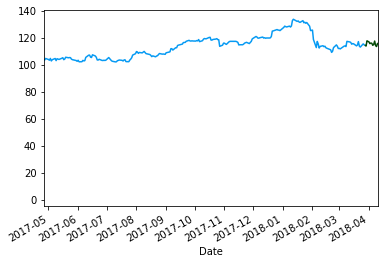

In [174]:
datesRange=pd.date_range(start="2018-03-28",end="2018-04-11")
plot.plot(datesRange,forecast_predicted,color="#054907")
df['Adj. Close'].plot(color='#069AF3')
plot.xlim(xmin=datetime.date(2017,4,26),xmax=datetime.date(2018,4,11))


The small green line at the end is the predicted stock price for the next 15 days.